# Township of Langley, Land and Parcel: data analysis

Building a regression model to predict the *current* price of properties, based on a consolidated list.

# PART 3
#### More info here:
https://data-tol.opendata.arcgis.com/

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Import data

In [2]:
dfland = pd.read_csv('land and parcel information\land.csv', index_col=0,
                     dtype={'House': np.object, 'AUC': np.object,
                            'PickUpDay':np.int8, 'LotSize_sq_ft':np.float64},
                     low_memory=False)

In [3]:
dfland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20995
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ParcelKey                        20996 non-null  int64  
 1   Section                          20996 non-null  object 
 2   ALR                              20996 non-null  object 
 3   Board_of_Variance                20996 non-null  object 
 4   Burning                          20996 non-null  object 
 5   Development_Permit_Area          20996 non-null  object 
 6   Heritage                         20996 non-null  object 
 7   Heritage_Conserve_Area           20996 non-null  object 
 8   Recycling_StartYear              20996 non-null  object 
 9   Recycling_Units_BlueBox          20996 non-null  int64  
 10  Recycling_Units_Toter            20996 non-null  int64  
 11  Secondary_Suite_Details          20996 non-null  object 
 12  Secondary_Suite_To

In [4]:
# Just use the first THREE characters of the Postal Code

dfland['Postal_Code'] = dfland['Postal_Code'].str[:3]
dfland['Postal_Code'].value_counts()

V1M    6429
V3A    4828
V4W    3591
V2Y    3086
V2Z    3036
V0X      12
VIM      12
V1A       2
Name: Postal_Code, dtype: int64

In [5]:
dfland.tail()

ParcelKey  Section         ALR Board_of_Variance      Burning  \
20991     134437       22  NOT IN ALR                 N      ALLOWED   
20992     104344       26  NOT IN ALR                 N  NOT ALLOWED   
20993     125548  No_Data  NOT IN ALR                 N  NOT ALLOWED   
20994     111181  No_Data  NOT IN ALR                 N  NOT ALLOWED   
20995     129661  No_Data  NOT IN ALR                 N  NOT ALLOWED   

      Development_Permit_Area Heritage Heritage_Conserve_Area  \
20991                       Y        N                      N   
20992                       Y        N                      N   
20993                       N        N                      N   
20994                       N        N                      N   
20995                       N       HI                      N   

      Recycling_StartYear  Recycling_Units_BlueBox  Recycling_Units_Toter  \
20991                1996                        1                      0   
20992                1996                        1                      0   
20993                1996                        1                      0   
20994                1996                        1                      0   
20995                1996                        1                      0   

      Secondary_Suite_Details Secondary_Suite_ToL_Services  Sewer_StartYear  \
20991                 No_Data                      No_Data             1996   
20992                 No_Data                      No_Data             1996   
20993                 No_Data                      No_Data             1996   
20994                 No_Data                      No_Data             1996   
20995                 No_Data                      No_Data             1996   

       Sewer_Units  Toters_on_Site Trees_of_Interest  Water_StartYear  \
20991            0               0                 N             4000   
20992            0               0                 N             1996   
20993            0               0                 N             1996   
20994            0               0                 N             1996   
20995            0               0                 N             1996   

       Water_Units  PickUpDay Residential_Solid_WasteService  SHAPE_Length  \
20991            1          1        Garbage_Green_Recycling    544.318865   
20992            0          1        Garbage_Green_Recycling    509.103440   
20993            1          3        Garbage_Green_Recycling    120.216521   
20994            1          3        Garbage_Green_Recycling    121.125834   
20995            1          3        Garbage_Green_Recycling    120.049754   

         SHAPE_Area    Street Postal_Code     Community Neighbourhood  \
20991  10363.083244    197 ST         V2Y    Willoughby       Latimer   
20992  11474.085783    200 ST         V2Y    Willoughby       Latimer   
20993    801.219052  QUEEN ST         V1M  Fort Langley       No_Data   
20994    817.733022  QUEEN ST         V1M  Fort Langley       No_Data   
20995    792.999183  MARY AVE         V1M  Fort Langley       No_Data   

      Legal_Type Zoning   Latitude   Longitude  LotSize_sq_ft  \
20991       LAND   SR-2  49.138936 -122.677784       111078.0   
20992       LAND   SR-2  49.150683 -122.666593       123274.8   
20993       LAND   R-1E  49.167754 -122.577740         8712.0   
20994       LAND   R-1E  49.167902 -122.577579         8712.0   
20995       LAND   R-1E  49.168194 -122.577261         8712.0   

       Total_Gross_Property_Assessment  
20991                        1840000.0  
20992                        9179000.0  
20993                        1277000.0  
20994                        1652000.0  
20995                        1145000.0

In [6]:
# random_state (any number) is used to ensure reproducibility of the sample
data = dfland.sample(frac=0.9, random_state=786)
data_unseen = dfland.drop(data.index)

In [7]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18896, 33)
Unseen Data For Predictions: (2100, 33)


In [8]:
from pycaret.regression import *

In [9]:
pycaret.__version__

'2.2.0'

In [10]:
exp_reg102 = setup(data=data, target='Total_Gross_Property_Assessment', session_id=123,
                   normalize=True, transformation=True, transform_target=True,
                   combine_rare_levels=True, rare_level_threshold=0.05,
                   remove_outliers=True, outliers_threshold=0.05,
                   remove_multicollinearity=True, multicollinearity_threshold=0.9,
                   silent=True
                  )

In [11]:
get_config('X').dtypes

ParcelKey          float32
Sewer_StartYear    float32
Water_StartYear    float32
PickUpDay             int8
SHAPE_Area         float32
                    ...   
Zoning_RM-3A       float32
Zoning_RM-4        float32
Zoning_SR-1        float32
Zoning_SR-2        float32
Zoning_SR-3        float32
Length: 427, dtype: object

In [12]:
list_models = models()
list_models

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp            pycaret.internal.tunable.TunableMLPRegressor  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True

In [13]:
list_models.index

Index(['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par',
       'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada',
       'gbr', 'mlp', 'xgboost', 'lightgbm', 'catboost'],
      dtype='object', name='ID')

In [14]:
# top3 = compare_models(include=['ada', 'gbr', 'xgboost', 'lightgbm', 'catboost'], n_select=3)
catboost = compare_models(include=['catboost'])

https://pycaret.org/plot-model/

**List of available plots (ID - Name):**<br>
`residuals` - Residuals Plot<br>
`error` - Prediction Error Plot<br>
`cooks` - Cooks Distance Plot<br>
`rfe` - Recursive Feat. Selection<br>
`learning` - Learning Curve<br>
`vc` - Validation Curve<br>
`manifold` - Manifold Learning<br>
`feature` - Feature Importance<br>
`feature_all` - Feature Importance (All)<br>
`parameter` - Model Hyperparameter<br>
`tree` - Decision Tree

In [15]:
catboost

PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x00000222069D63D0>,
                                task_type='CPU', verbose=False)

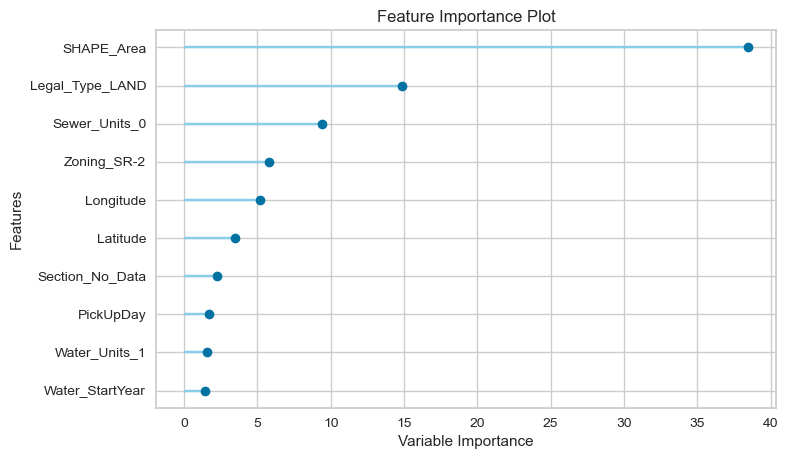

In [16]:
plot_model(catboost, plot='feature')

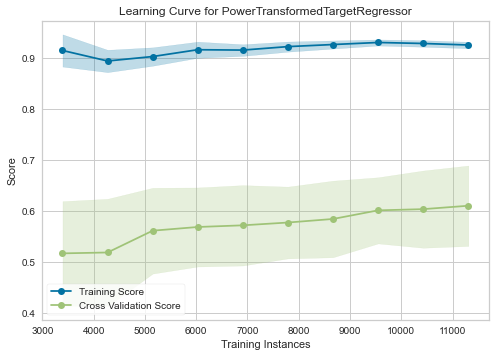

In [51]:
plot_model(catboost, plot='learning')

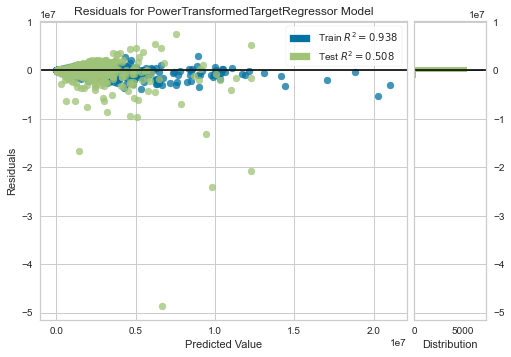

In [17]:
plot_model(catboost, plot='residuals')

In [18]:
catboost = create_model('catboost')

In [24]:
import scipy.stats

params = {'iterations': [250,500,1000],
          'learning_rate': scipy.stats.uniform(0.01, 0.3), 
          'l2_leaf_reg': scipy.stats.reciprocal(a=1e-2, b=1e1),
          'max_depth': scipy.stats.randint(3, 10),
          'one_hot_max_size': [30],
          'border_count': [32,5,10,20,50,100,200]
         }

In [25]:
catboost_tuned = tune_model(catboost, custom_grid=params)

In [26]:
plot_model(catboost_tuned, plot='parameter')

Parameters
loss_function                                                               RMSE
iterations                                                                   500
learning_rate                                                0.07805543606926092
l2_leaf_reg                                                  0.07218018732952579
border_count                                                                 200
verbose                                                                    False
one_hot_max_size                                                              30
task_type                                                                    CPU
max_depth                                                                      9
random_state                                                                 123
power_transformer_method                                                 box-cox
power_transformer_standardize                                               True
regressor                      <catboost.core.CatBoostRegressor object at 0x0...

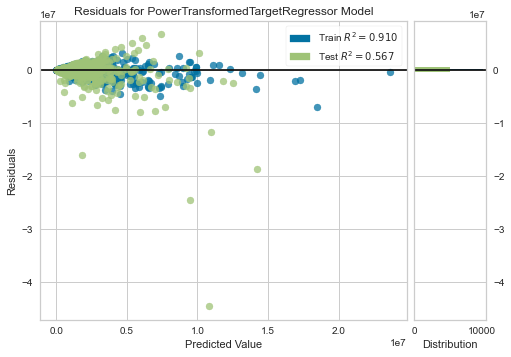

In [53]:
plot_model(catboost_tuned, plot='residuals')

In [27]:
predict_model(catboost_tuned)

ParcelKey  Sewer_StartYear  Water_StartYear  PickUpDay  SHAPE_Area  \
0      0.043265        -0.370744        -0.373333          3   -0.465906   
1      0.948279        -0.370744        -0.373333          1    1.883673   
2     -0.625016        -0.370744        -0.373333          4   -1.223527   
3      0.598865        -0.370744        -0.373333          4    0.196161   
4     -1.655076        -0.370744        -0.373333          4    2.101548   
...         ...              ...              ...        ...         ...   
5664  -1.173686         2.787635        -0.373333          1    1.915364   
5665   1.293624        -0.370744        -0.373333          2   -0.945012   
5666  -0.743988        -0.370744        -0.373333          4    0.103667   
5667   1.839304         2.788848         3.002603          1   -0.645929   
5668  -1.500479        -0.370744        -0.373333          4    0.691519   

      Latitude  Longitude  Section_1  Section_10  Section_11  ...  \
0     1.370801  -0.304251        0.0         0.0         0.0  ...   
1     0.724418  -0.571238        0.0         0.0         0.0  ...   
2    -0.359147   0.282956        0.0         0.0         0.0  ...   
3    -1.021574  -1.306084        0.0         0.0         0.0  ...   
4    -1.642460  -0.836974        0.0         0.0         0.0  ...   
...        ...        ...        ...         ...         ...  ...   
5664  1.010496  -1.504359        0.0         0.0         0.0  ...   
5665 -1.187410   1.509460        0.0         0.0         0.0  ...   
5666 -0.444543   0.455951        0.0         0.0         0.0  ...   
5667  0.452011  -1.427114        0.0         0.0         0.0  ...   
5668 -0.816809  -1.569139        0.0         0.0         0.0  ...   

      Zoning_RM-1  Zoning_RM-2  Zoning_RM-3  Zoning_RM-3A  Zoning_RM-4  \
0             0.0          0.0          0.0           0.0          0.0   
1             0.0          0.0          0.0           0.0          0.0   
2             0.0          1.0          0.0           0.0          0.0   
3             0.0          0.0          0.0           0.0          0.0   
4             0.0          0.0          0.0           0.0          0.0   
...           ...          ...          ...           ...          ...   
5664          0.0          0.0          0.0           0.0          0.0   
5665          0.0          0.0          0.0           0.0          0.0   
5666          0.0          0.0          0.0           0.0          0.0   
5667          0.0          0.0          0.0           0.0          0.0   
5668          0.0          0.0          0.0           0.0          0.0   

      Zoning_SR-1  Zoning_SR-2  Zoning_SR-3  Total_Gross_Property_Assessment  \
0             0.0          0.0          0.0                         763000.0   
1             0.0          1.0          0.0                        2370000.0   
2             0.0          0.0          0.0                         392000.0   
3             0.0          0.0          0.0                         955000.0   
4             0.0          1.0          0.0                        1552000.0   
...           ...          ...          ...                              ...   
5664          0.0          1.0          0.0                        1441000.0   
5665          0.0          0.0          0.0                         476900.0   
5666          0.0          0.0          0.0                        1072000.0   
5667          0.0          0.0          0.0                         957000.0   
5668          0.0          0.0          0.0                        1015000.0   

             Label  
0     7.738545e+05  
1     2.487473e+06  
2     4.588155e+05  
3     9.002229e+05  
4     2.606814e+06  
...            ...  
5664  1.400149e+06  
5665  4.753422e+05  
5666  1.025824e+06  
5667  1.010545e+06  
5668  9.797382e+05  

[5669 rows x 429 columns]

In [28]:
catboost_final = finalize_model(catboost_tuned)

In [29]:
unseen_predictions = predict_model(catboost_final, data=data_unseen)

In [30]:
unseen_predictions.tail().style \
                        .format({'Total_Gross_Property_Assessment': "{:,.0f}", 'Label': '{:,.0f}'})

In [31]:
from pycaret.utils import check_metric

check_metric(unseen_predictions['Total_Gross_Property_Assessment'], unseen_predictions.Label, 'R2')

0.7277